In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')


In [12]:
df_normal_list = []
pathlist = Path("/home/aggelos/Downloads/simu_Elbas/7h33NO").glob('**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    #df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_normal_list.append(df)

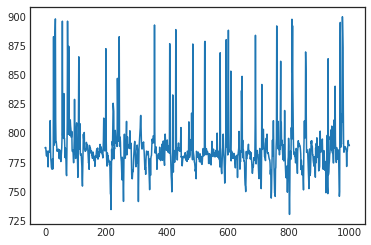

In [13]:
df_normal_list[0]['voltage [V]'].plot()

In [16]:
df_error_list = []
pathlist = Path("/home/aggelos/Downloads/simu_Elbas/7h33D3").glob('**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    #df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_error_list.append(df)

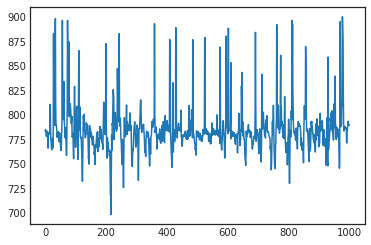

In [17]:
df_error_list[0]['voltage [V]'].plot()

In [47]:
roll_thres_list = list()
for df in df_normal_list:
    # suppose that we set our threshold at mean - 2*std
    window = 75
    rolling_thres = df['voltage [V]'].rolling(window=window).mean() - 3*df['voltage [V]'].rolling(window=window).std()
    roll_thres_list.append(rolling_thres)

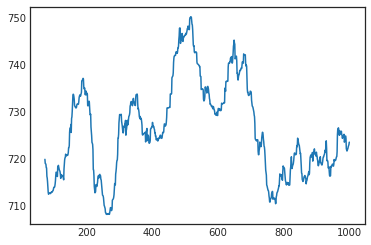

In [48]:
avg_thresh = np.zeros(1000)
for i in range(1000):
    for thres in roll_thres_list:
        avg_thresh[i] += thres.iloc[i]
avg_thresh = avg_thresh/20
plt.plot(avg_thresh)
    

<function matplotlib.pyplot.show(*args, **kw)>

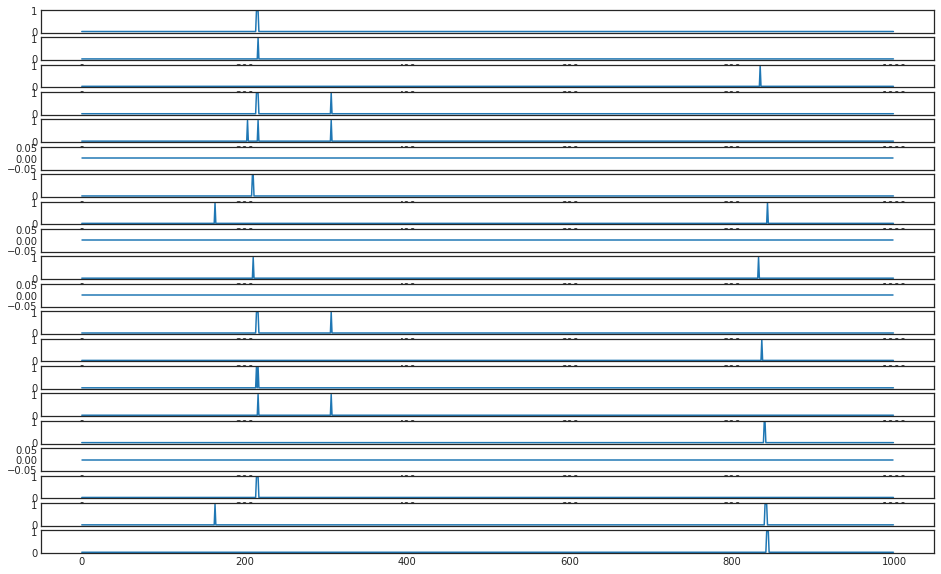

In [49]:
f = plt.figure(figsize=(16,10))
i=0
for df in df_error_list:
    f.add_subplot(20,1,i+1)
    plt.plot(df['voltage [V]'][:1000] < avg_thresh)
    i +=1
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

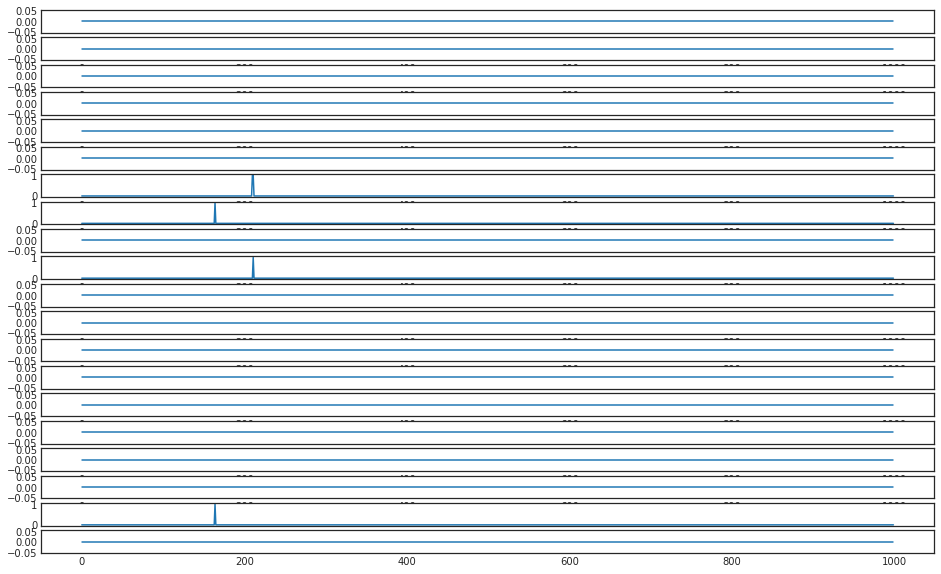

In [50]:
f = plt.figure(figsize=(16,10))
i=0
for df in df_normal_list:
    f.add_subplot(20,1,i+1)
    plt.plot(df['voltage [V]'][:1000] < avg_thresh)
    i +=1
plt.show